In [3]:
import sys
sys.path.append('../_amigocloud')

In [4]:
import simplekml

In [5]:
from amigocloud import AmigoCloud
import pandas as pd
from shapely import wkb

import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, MultiPoint
#from shapely.geometry import Point, MultiPoint
import os
#from fastkml import kml

In [6]:
# ruta de carpera donde estan las llaves
ruta = open('../ruta.txt')
ruta = ruta.readlines()[0]

In [7]:
# leer token
acceso = open(ruta + '/_keys/api_amigocloud.key','r')
api_token = acceso.readlines()[0]
acceso.close()
amigocloud = AmigoCloud(token=api_token)
amigocloud

In [8]:
# leer los dos shps de siembra y puntos de planificacion
path_siembras = r'C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\SIEMBRAS.shp'
path_cat = r'C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\catastro140624.shp'
path_puntos = r'C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PUNTOS_PLAN.shp'

path_plan = r'C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\SHP\PLANIFICACION.shp'

path_kml = r'C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN'

path_xlsx_parte = r'C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\PARTE DIARIO TRICHOGRAMMA 2024_RES.xlsx'

# ACTUALIZAR SHP PLANIFICACION

In [9]:
ors =74

In [10]:
gdf_siembras = gpd.read_file(path_siembras)
gdf_puntos = gpd.read_file(path_puntos)
gdf_cat = gpd.read_file(path_cat)

In [11]:
# verifica si ambos shps tienen el mismo CRS
if gdf_siembras.crs == gdf_puntos.crs:
    print('Ambas capas tienen el mismo CRS')
else:
    print('No tienen el mismo CRS')

Ambas capas tienen el mismo CRS


In [12]:
# filtrar la semana de interes
gdf_puntos_select = gdf_puntos[gdf_puntos['os'] == ors]
gdf_puntos_sem = gdf_puntos_select.copy()
#quita caracteres especiales
gdf_puntos_sem['unidad_04'] = gdf_puntos_sem['unidad_04'].str.replace(r'[\r\n\t]', '', regex=True)
gdf_puntos_sem

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
132,5307,HUANCA MENCHAQUE VICTOR,74,0,NaN,NaN,MULTIPOINT (499245.020 8095991.093)
133,20180,LINARES SALVATIERRA DAVID,74,0,NaN,NaN,MULTIPOINT (497592.544 8093680.725)
134,2029,COLAMARINO DI SILVIO ANGELO,74,0,NaN,NaN,"MULTIPOINT (492074.014 8096825.100, 493169.624..."
135,10816,PIEROLA VACA FERNANDO,74,0,NaN,NaN,"MULTIPOINT (491360.032 8097864.163, 492005.142..."
136,42073,TAPIA SEGOVIA ENRIQUE,74,0,NaN,NaN,MULTIPOINT (490513.875 8077894.340)
137,42178,CONDORI ORELLANA RUDDY,74,0,NaN,NaN,"MULTIPOINT (522650.331 8095548.456, 522730.919..."
138,42191,CALVI LEON MARIOLY,74,0,NaN,NaN,"MULTIPOINT (499761.118 8094636.088, 500290.087..."
139,2565,CANDIA RUIZ JOSE LUIS,74,0,NaN,NaN,MULTIPOINT (503231.622 8091323.547)
140,2565,CANDIA RUIZ JOSE LUIS,74,0,NaN,NaN,MULTIPOINT (501370.322 8102257.012)
141,446,AGUILERA ANEZ JHONNY,74,0,NaN,NaN,MULTIPOINT (494727.866 8087926.181)


In [13]:
multipoint_gdf = gdf_puntos_sem

In [14]:
# Crear una lista para almacenar los nuevos registros de puntos individuales
point_records = []
# Iterar sobre cada registro en el GeoDataFrame original
for idx, row in multipoint_gdf.iterrows():
    multipoint_geom = row.geometry
    # Verificar si la geometría es de tipo multipunto
    if isinstance(multipoint_geom, MultiPoint):
        for point in multipoint_geom.geoms:
            # Crear un nuevo registro para cada punto individual
            new_record = row.copy()
            new_record.geometry = point
            point_records.append(new_record)
    else:
        # Si la geometría ya es un punto, simplemente añadir el registro original
        point_records.append(row)

# Crear un nuevo GeoDataFrame con los registros de puntos individuales
puntos_indi = gpd.GeoDataFrame(point_records, crs=multipoint_gdf.crs)

In [15]:
# puntos individuales
puntos_indi

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
132,5307,HUANCA MENCHAQUE VICTOR,74,0,NaN,NaN,POINT (499245.020 8095991.093)
133,20180,LINARES SALVATIERRA DAVID,74,0,NaN,NaN,POINT (497592.544 8093680.725)
134,2029,COLAMARINO DI SILVIO ANGELO,74,0,NaN,NaN,POINT (492074.014 8096825.100)
134,2029,COLAMARINO DI SILVIO ANGELO,74,0,NaN,NaN,POINT (493169.624 8096764.409)
134,2029,COLAMARINO DI SILVIO ANGELO,74,0,NaN,NaN,POINT (492058.348 8096217.535)
...,...,...,...,...,...,...,...
169,41980,CASANOVA VELASCO JULIO CESAR,74,0,NaN,NaN,POINT (500250.558 8088625.799)
169,41980,CASANOVA VELASCO JULIO CESAR,74,0,NaN,NaN,POINT (500644.863 8088419.719)
169,41980,CASANOVA VELASCO JULIO CESAR,74,0,NaN,NaN,POINT (501040.974 8088205.159)
169,41980,CASANOVA VELASCO JULIO CESAR,74,0,NaN,NaN,POINT (501472.157 8087980.284)


<Axes: >

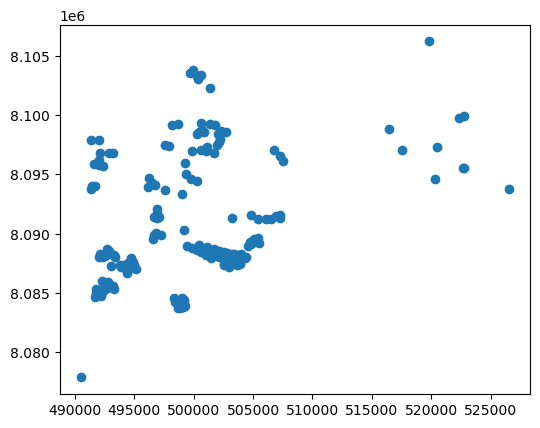

In [16]:
puntos_indi.plot()

In [17]:
# Asegurarse de que ambos GeoDataFrames tienen el mismo sistema de coordenadas (CRS)
if puntos_indi.crs != gdf_siembras.crs:
    print('Los CRS no son iguales')
    #gdf_siembras = gdf_siembras.to_crs(puntos_indi.crs)
else:
    print('Los CRS si son iguales')

Los CRS si son iguales


In [18]:
# Crear un GeoDataFrame vacío para almacenar los puntos que no intersectan con ningún polígono de siembras
puntos_indi_solicitado = puntos_indi[~puntos_indi.geometry.apply(lambda point: any(gdf_siembras.contains(point)))]

In [19]:
puntos_indi_solicitado

,unidad_03,unidad_04,os,dia,obs,procesado,geometry
142,86,AGUILERA TARADELLES JOSE LUIS,74,0,NaN,NaN,POINT (493835.701 8087324.615)
142,86,AGUILERA TARADELLES JOSE LUIS,74,0,NaN,NaN,POINT (493865.023 8087207.327)
142,86,AGUILERA TARADELLES JOSE LUIS,74,0,NaN,NaN,POINT (494452.837 8087539.318)
142,86,AGUILERA TARADELLES JOSE LUIS,74,0,NaN,NaN,POINT (494487.198 8087414.757)
142,86,AGUILERA TARADELLES JOSE LUIS,74,0,NaN,NaN,POINT (494751.980 8087582.717)
...,...,...,...,...,...,...,...
161,446,AGUILERA ANEZ JHONNY,74,0,NaN,NaN,POINT (498922.979 8084084.700)
161,446,AGUILERA ANEZ JHONNY,74,0,NaN,NaN,POINT (499173.966 8084175.068)
161,446,AGUILERA ANEZ JHONNY,74,0,NaN,NaN,POINT (499158.062 8084425.995)
161,446,AGUILERA ANEZ JHONNY,74,0,NaN,NaN,POINT (499044.578 8084575.437)


In [20]:
# identifoca los lotes que se intersectan
gdf_lotes_cat = gpd.sjoin(gdf_cat, puntos_indi_solicitado, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_cat = gdf_cat.loc[gdf_cat.index.isin(gdf_lotes_cat.index)]
# copy
poligonos_intersect_cat = poligonos_intersect_cat.copy()
poligonos_intersect_cat = poligonos_intersect_cat[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area', 'soca', 'zona', 'geometry']]

In [21]:
# Cambiar el nombre de la columna 'old_name' a 'new_name'
poligonos_intersect_cat.rename(columns={'zona': 'inst'}, inplace=True)

In [22]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
1783,400,TOTAISAL--AGUILERA AÑEZ,680,AGUILERA ANEZ YAQUELIN,L6,1.474470,5,66,"POLYGON ((499108.543 8084016.984, 499158.608 8..."
1784,400,TOTAISAL--AGUILERA AÑEZ,680,AGUILERA ANEZ YAQUELIN,L21,1.114158,7,66,"POLYGON ((498966.736 8084609.990, 499124.014 8..."
1785,400,TOTAISAL--AGUILERA AÑEZ,680,AGUILERA ANEZ YAQUELIN,L2,5.427209,9,66,"POLYGON ((499013.427 8084475.230, 499071.817 8..."
1786,400,TOTAISAL--AGUILERA AÑEZ,680,AGUILERA ANEZ YAQUELIN,L1,1.958996,9,66,"POLYGON ((499079.227 8084539.850, 499142.814 8..."
2391,510,LA BELLA & SANTA ROSA I & VILLA FLORES,1218,BALCAZAR ALCANTARA JOSE LOLY,L10.1,7.893906,5,66,"POLYGON ((502226.509 8088120.217, 502210.695 8..."
...,...,...,...,...,...,...,...,...,...
13416,1454,MIRAFLORES Y FAMOSA -- FERNADO CAMPBELL,1672,CAMPBELL BALCAZAR ALAN,A2,19.340150,0,50,"POLYGON ((500419.002 8099086.757, 500399.753 8..."
13417,1454,MIRAFLORES Y FAMOSA--CAMPBELL FERNANDO,41534,CAMPBELL MEDINA FERNANDO WALTER,F7.1,21.216284,0,50,"POLYGON ((502503.175 8098770.204, 502465.593 8..."
13418,1454,MIRAFLORES Y FAMOSA--CAMPBELL FERNANDO,41534,CAMPBELL MEDINA FERNANDO WALTER,F4.1,17.412171,0,50,"POLYGON ((501565.668 8099307.185, 501530.258 8..."
13419,1454,MIRAFLORES Y FAMOSA--CAMPBELL FERNANDO,41534,CAMPBELL MEDINA FERNANDO WALTER,F9.1,14.390238,0,50,"POLYGON ((502204.617 8098498.394, 502142.660 8..."


In [23]:
# CAMBIAR NOMBRE DATOS DE UNIDAD_03 Y UNDIAD_04 DE LOTES SOLICITADOS A LO INDICADO EN LOS PUNTOS
# Iterar sobre cada punto y encontrar el polígono que intersecta
for idx, point in puntos_indi_solicitado.iterrows():
    point_geom = point.geometry
    matching_polygons = poligonos_intersect_cat[poligonos_intersect_cat.intersects(point_geom)]
    
    # Actualizar los campos de los polígonos que intersectan con los valores del punto
    for poly_idx in matching_polygons.index:
        poligonos_intersect_cat.at[poly_idx, 'unidad_03'] = point['unidad_03']
        poligonos_intersect_cat.at[poly_idx, 'unidad_04'] = point['unidad_04']

In [24]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry
1783,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L6,1.474470,5,66,"POLYGON ((499108.543 8084016.984, 499158.608 8..."
1784,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L21,1.114158,7,66,"POLYGON ((498966.736 8084609.990, 499124.014 8..."
1785,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L2,5.427209,9,66,"POLYGON ((499013.427 8084475.230, 499071.817 8..."
1786,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L1,1.958996,9,66,"POLYGON ((499079.227 8084539.850, 499142.814 8..."
2391,510,LA BELLA & SANTA ROSA I & VILLA FLORES,1218,BALCAZAR ALCANTARA JOSE LOLY,L10.1,7.893906,5,66,"POLYGON ((502226.509 8088120.217, 502210.695 8..."
...,...,...,...,...,...,...,...,...,...
13416,1454,MIRAFLORES Y FAMOSA -- FERNADO CAMPBELL,41534,CAMPBELL MEDINA FERNANDO WALTER,A2,19.340150,0,50,"POLYGON ((500419.002 8099086.757, 500399.753 8..."
13417,1454,MIRAFLORES Y FAMOSA--CAMPBELL FERNANDO,41534,CAMPBELL MEDINA FERNANDO WALTER,F7.1,21.216284,0,50,"POLYGON ((502503.175 8098770.204, 502465.593 8..."
13418,1454,MIRAFLORES Y FAMOSA--CAMPBELL FERNANDO,41534,CAMPBELL MEDINA FERNANDO WALTER,F4.1,17.412171,0,50,"POLYGON ((501565.668 8099307.185, 501530.258 8..."
13419,1454,MIRAFLORES Y FAMOSA--CAMPBELL FERNANDO,41534,CAMPBELL MEDINA FERNANDO WALTER,F9.1,14.390238,0,50,"POLYGON ((502204.617 8098498.394, 502142.660 8..."


In [25]:
# agrega los campos faltantes
poligonos_intersect_cat['fecha_ini'] = ''
poligonos_intersect_cat['origen'] = 'SOLICITUD'
poligonos_intersect_cat['dias'] = 0
poligonos_intersect_cat['fecha'] = ''
poligonos_intersect_cat['os'] = ors

In [26]:
poligonos_intersect_cat

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os
1783,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L6,1.474470,5,66,"POLYGON ((499108.543 8084016.984, 499158.608 8...",,SOLICITUD,0,,74
1784,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L21,1.114158,7,66,"POLYGON ((498966.736 8084609.990, 499124.014 8...",,SOLICITUD,0,,74
1785,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L2,5.427209,9,66,"POLYGON ((499013.427 8084475.230, 499071.817 8...",,SOLICITUD,0,,74
1786,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L1,1.958996,9,66,"POLYGON ((499079.227 8084539.850, 499142.814 8...",,SOLICITUD,0,,74
2391,510,LA BELLA & SANTA ROSA I & VILLA FLORES,1218,BALCAZAR ALCANTARA JOSE LOLY,L10.1,7.893906,5,66,"POLYGON ((502226.509 8088120.217, 502210.695 8...",,SOLICITUD,0,,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13416,1454,MIRAFLORES Y FAMOSA -- FERNADO CAMPBELL,41534,CAMPBELL MEDINA FERNANDO WALTER,A2,19.340150,0,50,"POLYGON ((500419.002 8099086.757, 500399.753 8...",,SOLICITUD,0,,74
13417,1454,MIRAFLORES Y FAMOSA--CAMPBELL FERNANDO,41534,CAMPBELL MEDINA FERNANDO WALTER,F7.1,21.216284,0,50,"POLYGON ((502503.175 8098770.204, 502465.593 8...",,SOLICITUD,0,,74
13418,1454,MIRAFLORES Y FAMOSA--CAMPBELL FERNANDO,41534,CAMPBELL MEDINA FERNANDO WALTER,F4.1,17.412171,0,50,"POLYGON ((501565.668 8099307.185, 501530.258 8...",,SOLICITUD,0,,74
13419,1454,MIRAFLORES Y FAMOSA--CAMPBELL FERNANDO,41534,CAMPBELL MEDINA FERNANDO WALTER,F9.1,14.390238,0,50,"POLYGON ((502204.617 8098498.394, 502142.660 8...",,SOLICITUD,0,,74


In [27]:
# SELECCIONAR LOS LOTES DE SIEMBRAS
# identifoca los lotes que se intersectan
gdf_lotes_siem = gpd.sjoin(gdf_siembras, multipoint_gdf, how='inner', predicate='intersects')
# filtra los lotes intersectados en la capa original
poligonos_intersect_siem = gdf_siembras.loc[gdf_siembras.index.isin(gdf_lotes_siem.index)]
# copy
poligonos_intersect_siem = poligonos_intersect_siem.copy()
# agregar campo de semana_planificacion
poligonos_intersect_siem['os'] = ors

In [28]:
# crea el campo soca, y coloca 0 o 1 dependiendo del origen
poligonos_intersect_siem['soca'] = poligonos_intersect_siem['origen'].apply(lambda x: 1 if 'SIEMBRA 2023' in x else 0)

In [29]:
poligonos_intersect_siem = poligonos_intersect_siem[['unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'area',
       'fecha_ini', 'origen', 'dias', 'fecha', 'prioridad', 'inst', 'geometry', 'os', 'soca']]

In [30]:
poligonos_intersect_siem

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,prioridad,inst,geometry,os,soca
46,400,TOTAISAL--AGUILERA AÃ‘EZ,446,AGUILERA ANEZ JHONNY,L13,2.498861,20/6/2024,SIEMBRA 2023,44.0,2024-06-20,4,66.0,"POLYGON ((498592.377 8084146.610, 498678.283 8...",74,1
81,1454,MIRAFLORES Y FAMOSA -- FERNADO CAMPBELL,41534,CAMPBELL MEDINA FERNANDO WALTER,F18.1,17.471000,20/5/2024,SIEMBRA 2023,75.0,2024-05-20,4,50.0,"POLYGON ((500292.571 8097244.265, 500778.138 8...",74,1
98,31,NAVIDAD--VICENTE ROCA GIL,633,AGROP. VICENTE ROCA GIL SRL,L6,4.807945,31/5/2024,SIEMBRA 2023,64.0,2024-05-31,4,40.0,"POLYGON ((496239.925 8091226.975, 496774.959 8...",74,1
112,36,CHANEDU--MARSHA CECILIA SERRATE,10816,PIEROLA VACA FERNANDO,L3,1.980649,10/8/2024,SIEMBRA 2023,0.0,2024-08-10,4,40.0,"POLYGON ((491852.595 8097835.995, 491852.455 8...",74,1
124,62,EL REFUGIO--AGUILERA AÃ‘EZ,446,AGUILERA ANEZ JHONNY,L1,11.951428,15/5/2024,SIEMBRA 2023,80.0,2024-05-15,4,66.0,"POLYGON ((494533.973 8087685.147, 494491.588 8...",74,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,560,LA TUJA IAG SA,12105,ROCA REYES MIGUEL ANGEL,L6.2,1.061515,2024-05-12,SIEMBRA 2024,96.0,2024-05-12,4,8.0,"POLYGON ((492495.160 8085359.559, 492547.867 8...",74,0
868,2137,OKINAWA 390--TRUJILLO JAIME,42025,TRUJILLO CONDORI JAIME,L1,14.834774,2024-05-02,SIEMBRA 2024,106.0,2024-05-02,5,102.0,"POLYGON ((520265.296 8094787.925, 520367.943 8...",74,0
870,560,LA TUJA IAG SA,12105,ROCA REYES MIGUEL ANGEL,L2.2,2.387115,2024-05-10,SIEMBRA 2024,98.0,2024-05-10,4,8.0,"POLYGON ((492067.515 8084728.777, 492299.082 8...",74,0
871,1617,PAISAJE PARADA--CUELLAR URBANO,5448,HUANCA MENCHAQUE ROLY,L7.1,3.120130,2024-05-27,SIEMBRA 2024,81.0,2024-05-27,4,66.0,"POLYGON ((491964.890 8095816.355, 492232.333 8...",74,0


In [31]:
# Concatenar los DataFrames a lo largo de las filas (axis=0)
plan = pd.concat([poligonos_intersect_cat, poligonos_intersect_siem], axis=0)
# Si deseas restablecer el índice después de concatenar
plan.reset_index(drop=True, inplace=True)

<Axes: >

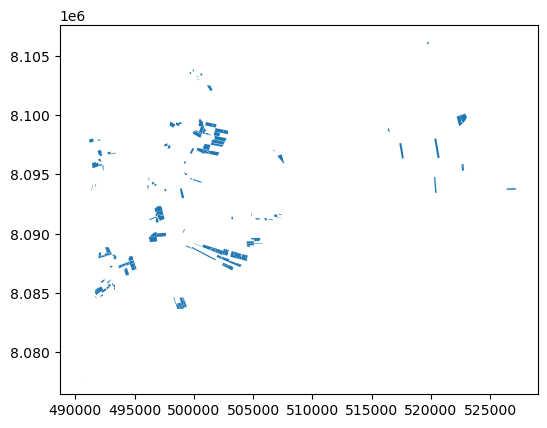

In [32]:
plan.plot()

In [33]:
plan['area'].sum()

1290.5674683636985

In [34]:
#RECALCULAR EL AREA
plan['area'] = plan.geometry.area / 10000

In [35]:
plan['area'].sum()

1290.5674683636432

In [36]:
# carga el shp de planificacion
gdf_plan = gpd.read_file(path_plan)

In [37]:
# determina el ultimo id
last_id = 0
if gdf_plan['id'].max() > 0:
    last_id = gdf_plan['id'].max()
else:
    last_id = 0

In [38]:
last_id

1325

In [39]:
# Asignar valores incrementales a la columna 'id' empezando desde last_id + 1
plan['id'] = range(last_id + 1, last_id + 1 + len(plan))

In [40]:
plan

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os,prioridad,id
0,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L6,1.474470,5,66,"POLYGON ((499108.543 8084016.984, 499158.608 8...",,SOLICITUD,0.0,,74,NaN,1326
1,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L21,1.114158,7,66,"POLYGON ((498966.736 8084609.990, 499124.014 8...",,SOLICITUD,0.0,,74,NaN,1327
2,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L2,5.427209,9,66,"POLYGON ((499013.427 8084475.230, 499071.817 8...",,SOLICITUD,0.0,,74,NaN,1328
3,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L1,1.958996,9,66,"POLYGON ((499079.227 8084539.850, 499142.814 8...",,SOLICITUD,0.0,,74,NaN,1329
4,510,LA BELLA & SANTA ROSA I & VILLA FLORES,1218,BALCAZAR ALCANTARA JOSE LOLY,L10.1,7.893906,5,66,"POLYGON ((502226.509 8088120.217, 502210.695 8...",,SOLICITUD,0.0,,74,NaN,1330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,560,LA TUJA IAG SA,12105,ROCA REYES MIGUEL ANGEL,L6.2,1.061515,0,8.0,"POLYGON ((492495.160 8085359.559, 492547.867 8...",2024-05-12,SIEMBRA 2024,96.0,2024-05-12,74,4.0,1504
179,2137,OKINAWA 390--TRUJILLO JAIME,42025,TRUJILLO CONDORI JAIME,L1,14.834774,0,102.0,"POLYGON ((520265.296 8094787.925, 520367.943 8...",2024-05-02,SIEMBRA 2024,106.0,2024-05-02,74,5.0,1505
180,560,LA TUJA IAG SA,12105,ROCA REYES MIGUEL ANGEL,L2.2,2.387115,0,8.0,"POLYGON ((492067.515 8084728.777, 492299.082 8...",2024-05-10,SIEMBRA 2024,98.0,2024-05-10,74,4.0,1506
181,1617,PAISAJE PARADA--CUELLAR URBANO,5448,HUANCA MENCHAQUE ROLY,L7.1,3.120130,0,66.0,"POLYGON ((491964.890 8095816.355, 492232.333 8...",2024-05-27,SIEMBRA 2024,81.0,2024-05-27,74,4.0,1507


In [41]:
len(plan)

183

In [42]:
# union de los dos gdf
gdf_pla_gral = pd.concat([gdf_plan, plan], ignore_index=True)

In [43]:
gdf_pla_gral['area'].sum()

10623.47896371863

In [44]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['dias'] = gdf_pla_gral['dias'].astype(int)
#gdf_pla_gral['prioridad'] = gdf_pla_gral['prioridad'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [45]:
# exportar los datos en nuevo shp
gdf_pla_gral.to_file(path_plan)

In [46]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,fecha_ini,origen,dias,fecha,...,os,soca,id,inst,telefono_1,telefono_2,telefono_3,idd,asignado,geometry
0,47,SANTA MARTHA,40149,PAZ REA JOSE ERNESTO,A7,10.696703,21/5/2024,SIEMBRA 2023,37,2024-05-21,...,26,1,1,69,0.0,0.0,0.0,35,NaN,"POLYGON ((488616.298 8103763.516, 488519.488 8..."
1,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L7.2,1.835936,2024-04-15,SIEMBRA 2024,73,2024-04-15,...,26,0,2,62,0.0,0.0,0.0,54,NaN,"POLYGON ((473330.370 8101634.734, 473440.011 8..."
2,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L6,1.960231,2024-04-15,SIEMBRA 2024,73,2024-04-15,...,26,0,3,62,0.0,0.0,0.0,54,NaN,"POLYGON ((473242.172 8101427.289, 473148.580 8..."
3,187,MATIAS--HABBAUER,5421,HUBBAUER HOYOS ENRIQUE,L9.1,3.607907,2024-04-16,SIEMBRA 2024,72,2024-04-16,...,26,0,4,62,0.0,0.0,0.0,54,NaN,"POLYGON ((473286.579 8101086.503, 473265.875 8..."
4,2123,LAS CHACRAS PORTACHUELO,13132,ZUMARAN MENACHO JORGE,L1.6,0.386826,2024-04-22,SIEMBRA 2024,66,2024-04-22,...,26,0,5,50,0.0,0.0,0.0,63,NaN,"POLYGON ((455236.898 8084312.120, 455248.807 8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,560,LA TUJA IAG SA,12105,ROCA REYES MIGUEL ANGEL,L6.2,1.061515,2024-05-12,SIEMBRA 2024,96,2024-05-12,...,74,0,1504,8,NaN,NaN,NaN,NaN,NaN,"POLYGON ((492495.160 8085359.559, 492547.867 8..."
1392,2137,OKINAWA 390--TRUJILLO JAIME,42025,TRUJILLO CONDORI JAIME,L1,14.834774,2024-05-02,SIEMBRA 2024,106,2024-05-02,...,74,0,1505,102,NaN,NaN,NaN,NaN,NaN,"POLYGON ((520265.296 8094787.925, 520367.943 8..."
1393,560,LA TUJA IAG SA,12105,ROCA REYES MIGUEL ANGEL,L2.2,2.387115,2024-05-10,SIEMBRA 2024,98,2024-05-10,...,74,0,1506,8,NaN,NaN,NaN,NaN,NaN,"POLYGON ((492067.515 8084728.777, 492299.082 8..."
1394,1617,PAISAJE PARADA--CUELLAR URBANO,5448,HUANCA MENCHAQUE ROLY,L7.1,3.120130,2024-05-27,SIEMBRA 2024,81,2024-05-27,...,74,0,1507,66,NaN,NaN,NaN,NaN,NaN,"POLYGON ((491964.890 8095816.355, 492232.333 8..."


# CARGAR PLANIFICACION A AMIGOCLOUD

In [47]:
def convertir_a_multipolygon(geometry):
    if isinstance(geometry, Polygon):
        return MultiPolygon([geometry])
    return geometry

def convertir_a_wkb(polygon):
    wkb_data = wkb.dumps(polygon, hex=True)
    return wkb_data

In [48]:
# repreyectar a WGS84
gdf_pla_gral = plan.to_crs(epsg=4326)
# convertir poligonos a multipoligonos
gdf_pla_gral['geometry'] = gdf_pla_gral['geometry'].apply(convertir_a_multipolygon)

In [49]:
gdf_pla_gral['unidad_01'] = gdf_pla_gral['unidad_01'].astype(int)
gdf_pla_gral['unidad_03'] = gdf_pla_gral['unidad_03'].astype(int)
gdf_pla_gral['dias'] = gdf_pla_gral['dias'].astype(int)
#gdf_pla_gral['prioridad'] = gdf_pla_gral['prioridad'].astype(int)
gdf_pla_gral['os'] = gdf_pla_gral['os'].astype(int)
gdf_pla_gral['soca'] = gdf_pla_gral['soca'].astype(int)
gdf_pla_gral['id'] = gdf_pla_gral['id'].astype(int)
gdf_pla_gral['inst'] = gdf_pla_gral['inst'].astype(int)

In [50]:
len(gdf_pla_gral)

183

In [51]:
# recorrer el gdf de lotes y cargarlo a amigocloud
id_proyecto = f'https://app.amigocloud.com/api/v1/projects/33457/sql'
for index, row in gdf_pla_gral.iterrows():
    wkb_hex = convertir_a_wkb(row['geometry'])
    insert_sql = f"""
    INSERT INTO dataset_345601 (id, unidad_01, unidad_02, unidad_03, unidad_04, unidad_05, area, origen, dias, os, geometry)
    VALUES ({row['id']}, {row['unidad_01']}, '{row['unidad_02']}', {row['unidad_03']}, '{row['unidad_04']}', '{row['unidad_05']}', {row['area']}, '{row['origen']}', '{row['dias']}', '{row['os']}', ST_SetSRID(ST_GeomFromWKB('\\x{wkb_hex}'), 4326));
    """
    query_sql = {'query': insert_sql}
    resultado_post = amigocloud.post(id_proyecto, query_sql)

# CREAR KMLS DE PLANIFICACION

In [52]:
gdf_plan = gpd.read_file(path_plan)

In [53]:
gdf_plan_sem = gdf_plan[gdf_plan['os'] == ors]
gdf_plan_sem['area'].sum()

1290.5674683636432

In [54]:
lista_cods = list(set(gdf_plan_sem['unidad_01']))

In [55]:
lista_cods

[258,
 907,
 1547,
 13,
 1294,
 142,
 400,
 1040,
 274,
 911,
 408,
 26,
 1823,
 31,
 33,
 1826,
 36,
 421,
 548,
 556,
 1454,
 560,
 55,
 1211,
 188,
 62,
 1603,
 1479,
 1865,
 1617,
 1492,
 344,
 2136,
 2137,
 360,
 1389,
 247,
 509,
 510]

In [56]:
for i in lista_cods:
    prop = gdf_plan_sem[gdf_plan_sem['unidad_01'] == i]
    prop_wgs = prop.to_crs(epsg=4326)
    output_folder = path_kml + '\\' + str(i)
    print(output_folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Recorrer el GeoDataFrame
    for idx, row in prop_wgs.iterrows():
        # Crear un nuevo documento KML
        kml_doc = simplekml.Kml()
        # Obtener el polígono y el nombre
        polygon = row['geometry']
        name = row['unidad_05']
        # Convertir el polígono en una lista de coordenadas
        coords = [(x, y) for x, y in zip(*polygon.exterior.xy)]    
        # Añadir el polígono al documento KML
        pol = kml_doc.newpolygon(name=name, outerboundaryis=coords)
        # Guardar el archivo KML
        file_name = f"{name}.kml"
        output_path = os.path.join(output_folder, file_name)
        kml_doc.save(output_path)

C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\258
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\907
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\1547
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\13
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\1294
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\142
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\400
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML_PLAN\1040
C:\Documents\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Trichogramma\2024\KML

# CARGAR XLSX

In [57]:
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from datetime import datetime

In [58]:
# Cargar el archivo Excel
sheet_name = 'DATA'
table_name = 'tbl_data'

In [59]:
excel_data = pd.read_excel(path_xlsx_parte)

In [60]:
gdf_pla_gral

,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,area,soca,inst,geometry,fecha_ini,origen,dias,fecha,os,prioridad,id
0,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L6,1.474470,5,66,"MULTIPOLYGON (((-63.00839 -17.32929, -63.00792...",,SOLICITUD,0,,74,NaN,1326
1,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L21,1.114158,7,66,"MULTIPOLYGON (((-63.00972 -17.32393, -63.00824...",,SOLICITUD,0,,74,NaN,1327
2,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L2,5.427209,9,66,"MULTIPOLYGON (((-63.00928 -17.32514, -63.00874...",,SOLICITUD,0,,74,NaN,1328
3,400,TOTAISAL--AGUILERA AÑEZ,446,AGUILERA ANEZ JHONNY,L1,1.958996,9,66,"MULTIPOLYGON (((-63.00867 -17.32456, -63.00807...",,SOLICITUD,0,,74,NaN,1329
4,510,LA BELLA & SANTA ROSA I & VILLA FLORES,1218,BALCAZAR ALCANTARA JOSE LOLY,L10.1,7.893906,5,66,"MULTIPOLYGON (((-62.97905 -17.29220, -62.97920...",,SOLICITUD,0,,74,NaN,1330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,560,LA TUJA IAG SA,12105,ROCA REYES MIGUEL ANGEL,L6.2,1.061515,0,8,"MULTIPOLYGON (((-63.07063 -17.31714, -63.07013...",2024-05-12,SIEMBRA 2024,96,2024-05-12,74,4.0,1504
179,2137,OKINAWA 390--TRUJILLO JAIME,42025,TRUJILLO CONDORI JAIME,L1,14.834774,0,102,"MULTIPOLYGON (((-62.80938 -17.23184, -62.80841...",2024-05-02,SIEMBRA 2024,106,2024-05-02,74,5.0,1505
180,560,LA TUJA IAG SA,12105,ROCA REYES MIGUEL ANGEL,L2.2,2.387115,0,8,"MULTIPOLYGON (((-63.07465 -17.32284, -63.07247...",2024-05-10,SIEMBRA 2024,98,2024-05-10,74,4.0,1506
181,1617,PAISAJE PARADA--CUELLAR URBANO,5448,HUANCA MENCHAQUE ROLY,L7.1,3.120130,0,66,"MULTIPOLYGON (((-63.07558 -17.22261, -63.07306...",2024-05-27,SIEMBRA 2024,81,2024-05-27,74,4.0,1507


In [61]:
list(gdf_pla_gral['unidad_01'])

[400,
 400,
 400,
 400,
 510,
 510,
 510,
 400,
 1454,
 1454,
 13,
 55,
 408,
 1454,
 400,
 55,
 510,
 510,
 400,
 510,
 13,
 510,
 510,
 13,
 13,
 13,
 1454,
 510,
 560,
 560,
 400,
 13,
 560,
 13,
 13,
 560,
 560,
 55,
 55,
 55,
 1454,
 1454,
 55,
 13,
 55,
 55,
 55,
 55,
 55,
 13,
 13,
 55,
 510,
 1454,
 1454,
 1454,
 1454,
 1454,
 1454,
 1454,
 1454,
 510,
 400,
 1454,
 31,
 36,
 62,
 1454,
 344,
 509,
 421,
 1454,
 360,
 400,
 1454,
 907,
 36,
 13,
 400,
 1294,
 1294,
 1454,
 1479,
 1294,
 1040,
 1823,
 1389,
 400,
 1547,
 509,
 1294,
 1826,
 408,
 13,
 1479,
 400,
 509,
 55,
 408,
 408,
 510,
 510,
 408,
 400,
 510,
 510,
 510,
 400,
 510,
 510,
 510,
 1211,
 408,
 510,
 510,
 510,
 400,
 510,
 408,
 510,
 2136,
 188,
 31,
 33,
 31,
 31,
 31,
 31,
 33,
 31,
 31,
 33,
 31,
 31,
 258,
 258,
 274,
 274,
 258,
 258,
 258,
 258,
 274,
 258,
 274,
 142,
 1492,
 142,
 142,
 556,
 911,
 26,
 556,
 911,
 556,
 247,
 556,
 556,
 1492,
 1492,
 1492,
 556,
 247,
 560,
 548,
 560,
 560,
 1603

In [62]:
new_data = {
    'INSTITUCION':list(gdf_pla_gral['inst']), 
    'COD CANERO': list(gdf_pla_gral['unidad_03']),
    'NOMBRE CANERO': list(gdf_pla_gral['unidad_04']),
    'COD PROPIEDAD': list(gdf_pla_gral['unidad_01']),
    'NOMBRE PROPIEDAD': list(gdf_pla_gral['unidad_02']),
    'LOTE': list(gdf_pla_gral['unidad_05']),
    'HECTAREA': list(gdf_pla_gral['area']),
    'CICLO': list(gdf_pla_gral['soca']),
    'FINANCIADO': list(gdf_pla_gral['origen']),
    'ID': list(gdf_pla_gral['id']),
    'OS': list(gdf_pla_gral['os'])
}

new_df = pd.DataFrame(new_data)

In [63]:
new_df['PRODUCTO'] = 'TRICHOGRAMMA'
new_df['DOSIS'] = '6ml'

In [64]:
new_df

,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,CICLO,FINANCIADO,ID,OS,PRODUCTO,DOSIS
0,66,446,AGUILERA ANEZ JHONNY,400,TOTAISAL--AGUILERA AÑEZ,L6,1.474470,5,SOLICITUD,1326,74,TRICHOGRAMMA,6ml
1,66,446,AGUILERA ANEZ JHONNY,400,TOTAISAL--AGUILERA AÑEZ,L21,1.114158,7,SOLICITUD,1327,74,TRICHOGRAMMA,6ml
2,66,446,AGUILERA ANEZ JHONNY,400,TOTAISAL--AGUILERA AÑEZ,L2,5.427209,9,SOLICITUD,1328,74,TRICHOGRAMMA,6ml
3,66,446,AGUILERA ANEZ JHONNY,400,TOTAISAL--AGUILERA AÑEZ,L1,1.958996,9,SOLICITUD,1329,74,TRICHOGRAMMA,6ml
4,66,1218,BALCAZAR ALCANTARA JOSE LOLY,510,LA BELLA & SANTA ROSA I & VILLA FLORES,L10.1,7.893906,5,SOLICITUD,1330,74,TRICHOGRAMMA,6ml
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,8,12105,ROCA REYES MIGUEL ANGEL,560,LA TUJA IAG SA,L6.2,1.061515,0,SIEMBRA 2024,1504,74,TRICHOGRAMMA,6ml
179,102,42025,TRUJILLO CONDORI JAIME,2137,OKINAWA 390--TRUJILLO JAIME,L1,14.834774,0,SIEMBRA 2024,1505,74,TRICHOGRAMMA,6ml
180,8,12105,ROCA REYES MIGUEL ANGEL,560,LA TUJA IAG SA,L2.2,2.387115,0,SIEMBRA 2024,1506,74,TRICHOGRAMMA,6ml
181,66,5448,HUANCA MENCHAQUE ROLY,1617,PAISAJE PARADA--CUELLAR URBANO,L7.1,3.120130,0,SIEMBRA 2024,1507,74,TRICHOGRAMMA,6ml


In [65]:
final_data = pd.concat([excel_data, new_df], ignore_index=True)

In [66]:
final_data.to_excel(path_xlsx_parte, index=False)